# Exploratory Data Analysis on Rice Yield Dataset

In this project, we're going to explore the cleaned dataset — visualizing attributes, imputing missing values, checking data types and so on.

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('..\\data\\combined_file\\combined.csv')
df.head()

,year,dist_name,actual_evapotranspiration,rice_area_1000_ha,rice_production_1000_tons,rice_yield_kg_per_ha,rice_irrigated_area_1000_ha,maximum_temperature,minimum_temperature,precipitation,nitrogen_kharif_consumption_tons,nitrogen_rabi_consumption_tons,phosphate_kharif_consumption_tons,phosphate_rabi_consumption_tons,potash_kharif_consumption_tons,potash_rabi_consumption_tons,total_kharif_consumption_tons,total_rabi_consumption_tons,water_deficit
0,1990,Coimbatore,67.75,18.16,62.75,3455.00,18.16,30.11,20.84,82.44,14596.00,18250.00,5249.00,5449.00,11983.00,11611.00,31828.00,35310.00,67.48
1,1990,Cuddalore,88.41,179.94,611.61,3399.00,177.17,33.09,24.18,96.53,16764.00,27259.00,8862.00,9773.00,12635.00,13412.00,38261.00,50444.00,70.68
2,1990,Dharmapuri,61.98,29.93,96.18,3213.00,29.84,32.10,21.22,63.40,2785.00,4158.00,1493.00,1767.00,2390.00,1996.00,6668.00,7921.00,85.49
3,1990,Dindigul,62.80,21.95,80.56,3670.00,21.95,31.14,21.54,73.56,3505.00,4521.00,1814.00,1993.00,2138.00,2768.00,7457.00,9282.00,88.09
4,1990,Erode,47.85,64.26,277.26,4315.00,64.26,31.64,21.31,50.69,9055.00,16121.00,4995.00,5196.00,5242.00,5774.00,19292.00,27091.00,98.29


In [3]:
df.columns

Index(['year', 'dist_name', 'actual_evapotranspiration', 'rice_area_1000_ha',
       'rice_production_1000_tons', 'rice_yield_kg_per_ha',
       'rice_irrigated_area_1000_ha', 'maximum_temperature',
       'minimum_temperature', 'precipitation',
       'nitrogen_kharif_consumption_tons', 'nitrogen_rabi_consumption_tons',
       'phosphate_kharif_consumption_tons', 'phosphate_rabi_consumption_tons',
       'potash_kharif_consumption_tons', 'potash_rabi_consumption_tons',
       'total_kharif_consumption_tons', 'total_rabi_consumption_tons',
       'water_deficit'],
      dtype='object')

In [4]:
# # List of variables to visualize
# variables = ['year',
#              'dist_name',
#              'actual_evapotranspiration',
#              'rice_area_1000_ha',
#              'rice_production_1000_tons',
#              'rice_yield_kg_per_ha',
#              'rice_irrigated_area_1000_ha',
#              'maximum_temperature',
#              'minimum_temperature', 
#              'precipitation',
#              'water_deficit'
#             ]

# # Add your actual interpretation for each variable here
# remarks = {
#     "year": "Approximately all districts have data for all years, except a few.",
#     "precipitation": "The data is approximately normal with slight right skew.",
#     "rice_yield": 'The `rice_yield` variable is approximately normal with left skew.',
#     "actual_evapotranspiration": "Almost normally distributed with no outliers or skewness.",
#     "water_deficit": "Negative skewness suggests most values are high.",
#     "maximum_temperature": "Distribution is bi-modal",
#     "minimum_temperature": "Distribution is bi-modal.",
#     "irrigated_area": "The data is approximately normal with right skew.",
#     "rice_area": "The data is approximately normal with right skew.",
#     "rice_production": "The data is approximately normal with slight right skew.",
#     "water_deficit": "Almost normally distributed with no outliers or skewness."
# }


In [5]:
# import ipywidgets as widgets
# import matplotlib.pyplot as plt
# import seaborn as sns
# from IPython.display import display, Markdown

# # Dropdown widget to choose variable
# dropdown = widgets.Dropdown(
#     options=variables,
#     description='Variable:',
#     style={'description_width': 'initial'},
#     layout=widgets.Layout(width='50%')
# )

# # Output area to show plot and remarks
# output = widgets.Output()

# # Function to update plot and remarks
# def update_plot(change):
#     output.clear_output()
#     with output:
#         col = change['new']
        
#         # Plot
#         sns.histplot(df[col], kde=True)
#         plt.title(f"Distribution of {col}")
#         plt.xlabel(col)
#         plt.ylabel("Frequency")
#         plt.show()
        
#         # Show markdown remark
#         display(Markdown(f"**Remarks for `{col}`**: {remarks[col]}"))

# # Trigger plot update when dropdown value changes
# dropdown.observe(update_plot, names='value')

# # Display
# display(dropdown)
# update_plot({'new': dropdown.value})  # Show initial plot
# display(output)

In [6]:
pd.DataFrame(df.columns, columns=['Parameters / Columns'])

,Parameters / Columns
0,year
1,dist_name
2,actual_evapotranspiration
3,rice_area_1000_ha
4,rice_production_1000_tons
5,rice_yield_kg_per_ha
6,rice_irrigated_area_1000_ha
7,maximum_temperature
8,minimum_temperature
9,precipitation


The target variable is `rice_yield_kg_per_ha`. Every other column is a feature that we'll be using to predict the target.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               721 non-null    int64  
 1   dist_name                          721 non-null    object 
 2   actual_evapotranspiration          721 non-null    float64
 3   rice_area_1000_ha                  721 non-null    float64
 4   rice_production_1000_tons          721 non-null    float64
 5   rice_yield_kg_per_ha               721 non-null    float64
 6   rice_irrigated_area_1000_ha        721 non-null    float64
 7   maximum_temperature                721 non-null    float64
 8   minimum_temperature                721 non-null    float64
 9   precipitation                      721 non-null    float64
 10  nitrogen_kharif_consumption_tons   721 non-null    float64
 11  nitrogen_rabi_consumption_tons     721 non-null    float64

There are no `null` values in the dataset. The method `.info()` only counts `numpy.nan` as `null` values but not `-1`.

In [8]:
pd.DataFrame(df['dist_name'].unique(), columns=['Districts'])

,Districts
0,Coimbatore
1,Cuddalore
2,Dharmapuri
3,Dindigul
4,Erode
5,Kancheepuram
6,Kanyakumari
7,Madurai
8,Pudukkottai
9,Ramananthapuram


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Renaming the column names for better readability
df.rename(columns={
                   'rice_area_1000_ha': 'rice_area',
                   'rice_production_1000_tons': 'rice_production',
                   'rice_yield_kg_per_ha': 'rice_yield',
                   'avg_evapotranspiration_mm': 'avg_act_evapotranspiration',
                   'avg_pot_evapotranspiration_mm': 'avg_pot_evapotranspiration',
                   'rice_irrigated_area_1000_ha': 'rice_irrigated_area',
                   'avg_precipitation_mm': 'avg_precipitation',
                   'avg_water_deficit_mm': 'avg_water_deficit',
                   'nitrogen_kharif_consumption_tons': 'nitrogen_kharif',
                   'nitrogen_rabi_consumption_tons': 'nitrogen_rabi',
                   'phosphate_kharif_consumption_tons': 'phosphate_kharif',
                   'phosphate_rabi_consumption_tons': 'phosphate_rabi',
                   'potash_kharif_consumption_tons': 'potash_kharif',
                   'potash_rabi_consumption_tons': 'potash_rabi',
                   'total_kharif_consumption_tons': 'total_kharif',
                   'total_rabi_consumption_tons': 'total_rabi'
                   },
          inplace=True)

In [11]:
df.columns

Index(['year', 'dist_name', 'actual_evapotranspiration', 'rice_area',
       'rice_production', 'rice_yield', 'rice_irrigated_area',
       'maximum_temperature', 'minimum_temperature', 'precipitation',
       'nitrogen_kharif', 'nitrogen_rabi', 'phosphate_kharif',
       'phosphate_rabi', 'potash_kharif', 'potash_rabi', 'total_kharif',
       'total_rabi', 'water_deficit'],
      dtype='object')

In [12]:
df.head()

,year,dist_name,actual_evapotranspiration,rice_area,rice_production,rice_yield,rice_irrigated_area,maximum_temperature,minimum_temperature,precipitation,nitrogen_kharif,nitrogen_rabi,phosphate_kharif,phosphate_rabi,potash_kharif,potash_rabi,total_kharif,total_rabi,water_deficit
0,1990,Coimbatore,67.75,18.16,62.75,3455.00,18.16,30.11,20.84,82.44,14596.00,18250.00,5249.00,5449.00,11983.00,11611.00,31828.00,35310.00,67.48
1,1990,Cuddalore,88.41,179.94,611.61,3399.00,177.17,33.09,24.18,96.53,16764.00,27259.00,8862.00,9773.00,12635.00,13412.00,38261.00,50444.00,70.68
2,1990,Dharmapuri,61.98,29.93,96.18,3213.00,29.84,32.10,21.22,63.40,2785.00,4158.00,1493.00,1767.00,2390.00,1996.00,6668.00,7921.00,85.49
3,1990,Dindigul,62.80,21.95,80.56,3670.00,21.95,31.14,21.54,73.56,3505.00,4521.00,1814.00,1993.00,2138.00,2768.00,7457.00,9282.00,88.09
4,1990,Erode,47.85,64.26,277.26,4315.00,64.26,31.64,21.31,50.69,9055.00,16121.00,4995.00,5196.00,5242.00,5774.00,19292.00,27091.00,98.29


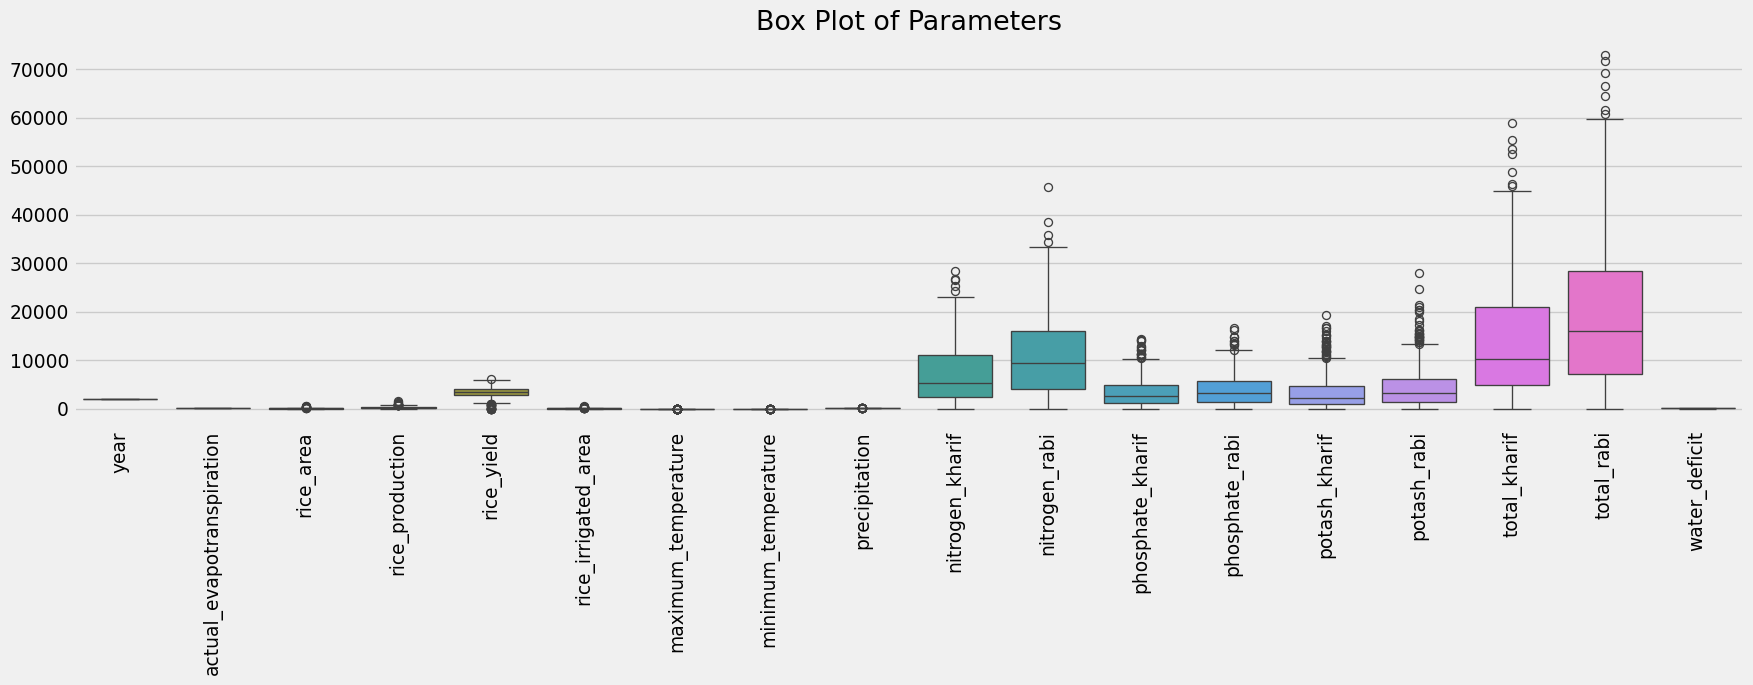

In [13]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1, figsize=(20, 5))

plt.xticks(rotation=90)

sns.boxplot(df.drop(columns=['dist_name']), ax=ax);
plt.title('Box Plot of Parameters');

In [14]:
n_years = df['year'].nunique()
min_year= df['year'].min()
max_year = df['year'].max()

print(f"The rice yield dataset has {n_years} years' data with minimum year: {min_year} and maximum year: {max_year}")

The rice yield dataset has 26 years' data with minimum year: 1990 and maximum year: 2015


In [15]:
n_districts = df['dist_name'].nunique()

print(f'There are {n_districts} unique districts in the dataset')

There are 32 unique districts in the dataset


In [16]:
district_data_count = pd.DataFrame(df['dist_name'].value_counts())
district_data_count

,count
dist_name,
Coimbatore,26
Cuddalore,26
Dharmapuri,26
Dindigul,26
Erode,26
Kancheepuram,26
Kanyakumari,26
Madurai,26
Pudukkottai,26


More than half of the districts have data for all the 26 years. So, we are removing some districts that do not have enough data.

In [17]:
low_data_districts = district_data_count[district_data_count['count'] <= 20].index
low_data_districts

Index(['Karur', 'Perambular', 'Theni', 'Thiruvallur', 'Thiruvarur', 'Namakkal',
       'Krishnagiri', 'Chennai', 'Ariyalur', 'Tiruppur'],
      dtype='object', name='dist_name')

In [18]:
district_mask = ~df['dist_name'].isin(low_data_districts)
district_mask

0       True
1       True
2       True
3       True
4       True
       ...  
716    False
717     True
718     True
719     True
720     True
Name: dist_name, Length: 721, dtype: bool

In [19]:
filtered_df = df[district_mask]
filtered_df['dist_name'].unique()

array(['Coimbatore', 'Cuddalore', 'Dharmapuri', 'Dindigul', 'Erode',
       'Kancheepuram', 'Kanyakumari', 'Madurai', 'Pudukkottai',
       'Ramananthapuram', 'Salem', 'Sivagangai', 'Thanjavur',
       'The Nilgiris', 'Thirunelveli', 'Thoothukudi', 'Tiruchirappalli',
       'Tiruvannamalai', 'Vellore', 'Virudhunagar', 'Nagapattinam',
       'Villupuram'], dtype=object)

In [20]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 720
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       566 non-null    int64  
 1   dist_name                  566 non-null    object 
 2   actual_evapotranspiration  566 non-null    float64
 3   rice_area                  566 non-null    float64
 4   rice_production            566 non-null    float64
 5   rice_yield                 566 non-null    float64
 6   rice_irrigated_area        566 non-null    float64
 7   maximum_temperature        566 non-null    float64
 8   minimum_temperature        566 non-null    float64
 9   precipitation              566 non-null    float64
 10  nitrogen_kharif            566 non-null    float64
 11  nitrogen_rabi              566 non-null    float64
 12  phosphate_kharif           566 non-null    float64
 13  phosphate_rabi             566 non-null    float64
 14 

In [21]:
filtered_df.head()

,year,dist_name,actual_evapotranspiration,rice_area,rice_production,rice_yield,rice_irrigated_area,maximum_temperature,minimum_temperature,precipitation,nitrogen_kharif,nitrogen_rabi,phosphate_kharif,phosphate_rabi,potash_kharif,potash_rabi,total_kharif,total_rabi,water_deficit
0,1990,Coimbatore,67.75,18.16,62.75,3455.00,18.16,30.11,20.84,82.44,14596.00,18250.00,5249.00,5449.00,11983.00,11611.00,31828.00,35310.00,67.48
1,1990,Cuddalore,88.41,179.94,611.61,3399.00,177.17,33.09,24.18,96.53,16764.00,27259.00,8862.00,9773.00,12635.00,13412.00,38261.00,50444.00,70.68
2,1990,Dharmapuri,61.98,29.93,96.18,3213.00,29.84,32.10,21.22,63.40,2785.00,4158.00,1493.00,1767.00,2390.00,1996.00,6668.00,7921.00,85.49
3,1990,Dindigul,62.80,21.95,80.56,3670.00,21.95,31.14,21.54,73.56,3505.00,4521.00,1814.00,1993.00,2138.00,2768.00,7457.00,9282.00,88.09
4,1990,Erode,47.85,64.26,277.26,4315.00,64.26,31.64,21.31,50.69,9055.00,16121.00,4995.00,5196.00,5242.00,5774.00,19292.00,27091.00,98.29


In [22]:
filtered_df['year'].nunique()

26

## Feature Engineering

In [23]:
 # The `year_rescale` feature contains values between 1 and 26 which corresponds to 1990 and 2015.
filtered_df['year_rescale'] = abs((filtered_df['year'].max() + 1) - filtered_df['year'])
filtered_df['year_rescale'].min(), filtered_df['year_rescale'].max()

(np.int64(1), np.int64(26))

## Distribution of Response Variable

### Rice Yield

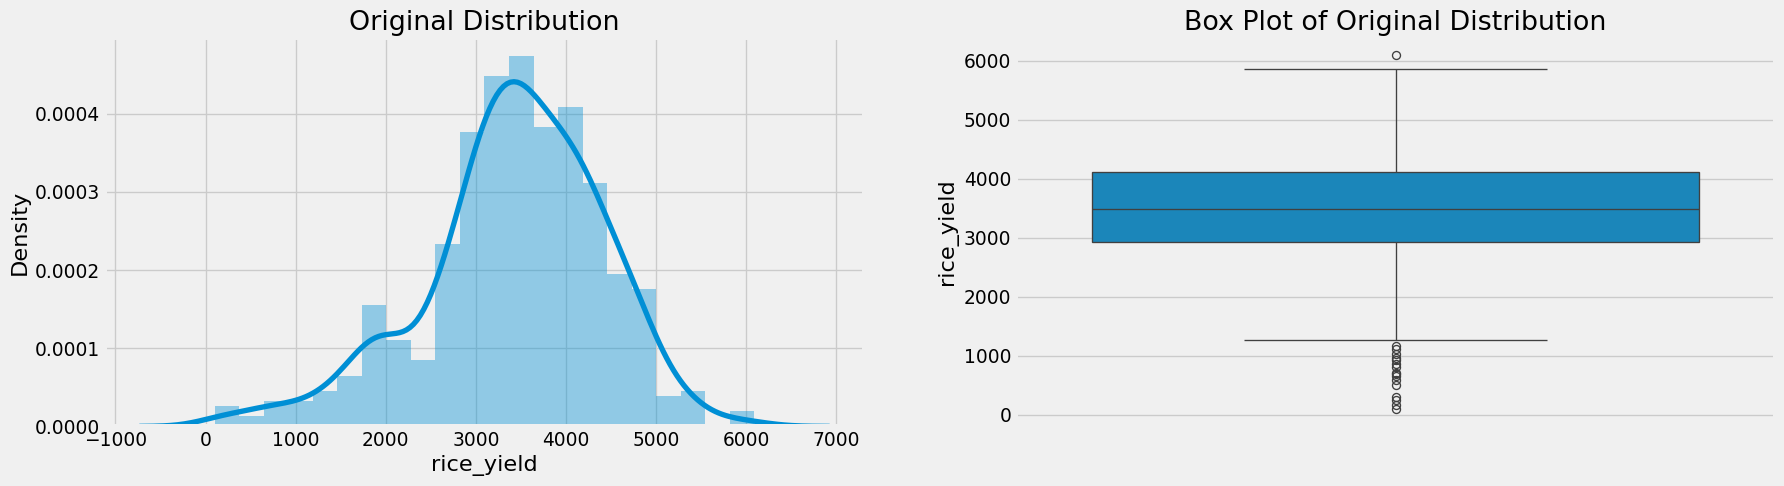

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['rice_yield'], ax=ax[0]);
ax[0].set_title('Original Distribution');

# Axes 2: box plot of the original distribution
sns.boxplot(filtered_df['rice_yield'], ax=ax[1]);
ax[1].set_title('Box Plot of Original Distribution');

The `rice_yield` variable is approximately normal with left skew.

In [25]:
filtered_df['rice_yield'].min(), filtered_df['rice_yield'].max()

(np.float64(101.0), np.float64(6090.0))

In [26]:
filtered_df[filtered_df['rice_yield'] == 101.0]

,year,dist_name,actual_evapotranspiration,rice_area,rice_production,rice_yield,rice_irrigated_area,maximum_temperature,minimum_temperature,precipitation,nitrogen_kharif,nitrogen_rabi,phosphate_kharif,phosphate_rabi,potash_kharif,potash_rabi,total_kharif,total_rabi,water_deficit,year_rescale
114,1995,Ramananthapuram,60.46,128.38,13.03,101.00,48.63,33.62,25.42,52.38,1147.00,4244.00,980.00,1062.00,598.00,1477.00,2725.00,6783.00,103.95,21


In [27]:
filtered_df[filtered_df['dist_name'] == 'Ramananthapuram']

,year,dist_name,actual_evapotranspiration,rice_area,rice_production,rice_yield,rice_irrigated_area,maximum_temperature,minimum_temperature,precipitation,nitrogen_kharif,nitrogen_rabi,phosphate_kharif,phosphate_rabi,potash_kharif,potash_rabi,total_kharif,total_rabi,water_deficit,year_rescale
9,1990,Ramananthapuram,59.57,151.27,263.44,1742.00,64.08,33.36,25.64,72.39,1094.00,5260.00,298.00,1075.00,251.00,900.00,1643.00,7235.00,109.78,26
29,1991,Ramananthapuram,61.12,137.38,69.47,506.00,56.53,33.38,25.65,57.74,1273.00,5952.00,430.00,1969.00,245.00,1820.00,1948.00,9741.00,103.17,25
50,1992,Ramananthapuram,58.02,146.34,224.91,1537.00,57.68,33.42,25.00,66.61,680.00,7507.00,262.00,1345.00,86.00,210.00,1028.00,9062.00,109.10,24
71,1993,Ramananthapuram,59.03,144.00,319.00,2215.00,58.65,33.48,25.04,81.73,1578.00,6566.00,311.00,1446.00,123.00,773.00,2012.00,8785.00,114.89,23
92,1994,Ramananthapuram,71.98,144.74,213.84,1477.00,60.34,33.50,25.18,61.95,1095.00,6017.00,841.00,1254.00,654.00,888.00,2590.00,8159.00,96.07,22
114,1995,Ramananthapuram,60.46,128.38,13.03,101.00,48.63,33.62,25.42,52.38,1147.00,4244.00,980.00,1062.00,598.00,1477.00,2725.00,6783.00,103.95,21
138,1996,Ramananthapuram,62.75,132.40,148.34,1120.00,53.61,33.57,25.13,67.16,14793.00,4918.00,540.00,1197.00,1158.00,610.00,16491.00,6725.00,108.48,20
166,1997,Ramananthapuram,51.80,144.63,480.49,3322.00,62.62,33.66,25.62,81.09,1957.00,8823.00,844.00,1281.00,616.00,1100.00,3417.00,11204.00,116.38,19
195,1998,Ramananthapuram,78.87,132.34,377.45,2852.00,59.24,34.15,25.79,76.66,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,90.38,18
224,1999,Ramananthapuram,66.07,129.88,85.20,656.00,53.64,33.55,25.04,59.44,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,102.87,17


## Distribution of Predictor Variables

### Districts

Text(0, 0.5, 'Years Data')

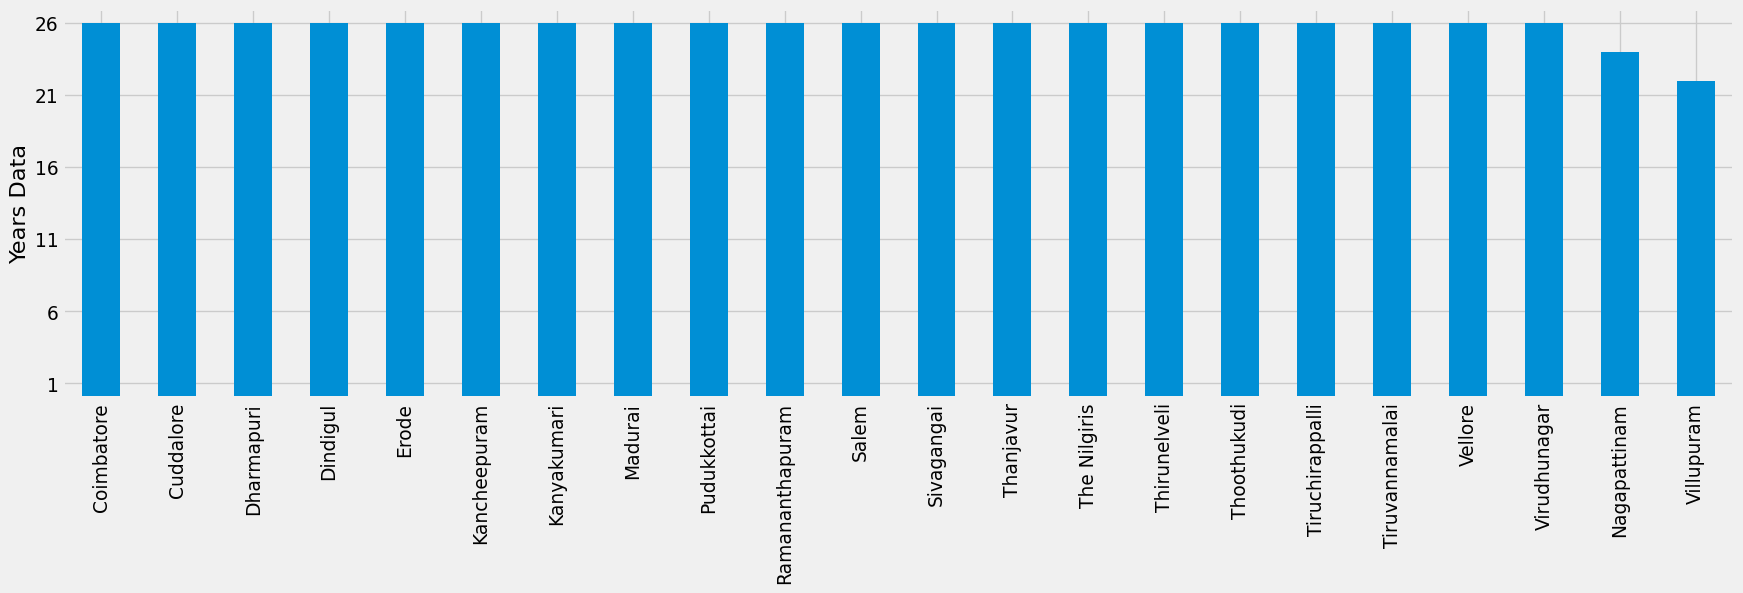

In [28]:
fig, axes = plt.subplots(1, figsize=(20, 5))
filtered_df['dist_name'].value_counts().plot(kind='bar');

axes.set_ylim(0, 27)
axes.set_yticks(range(1, 27, 5))
axes.set_xlabel('') # Hide the x-axis label 
axes.set_ylabel('Years Data')

### Rice Production

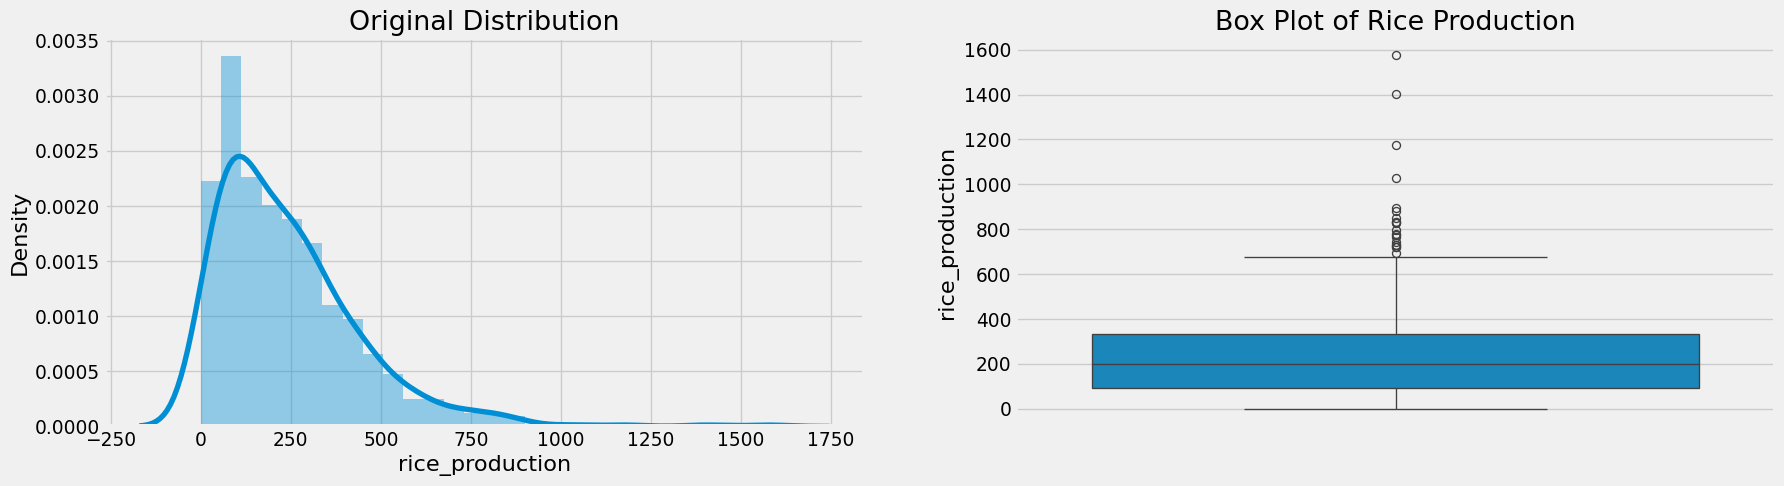

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['rice_production'], ax=axes[0]);
axes[0].set_title('Original Distribution');

#Axes 2: box plot of the distribution
sns.boxplot(filtered_df['rice_production'], ax=axes[1]);
axes[1].set_title('Box Plot of Rice Production');

The distribution is approximately normal with right skew.

Correlation: 0.02


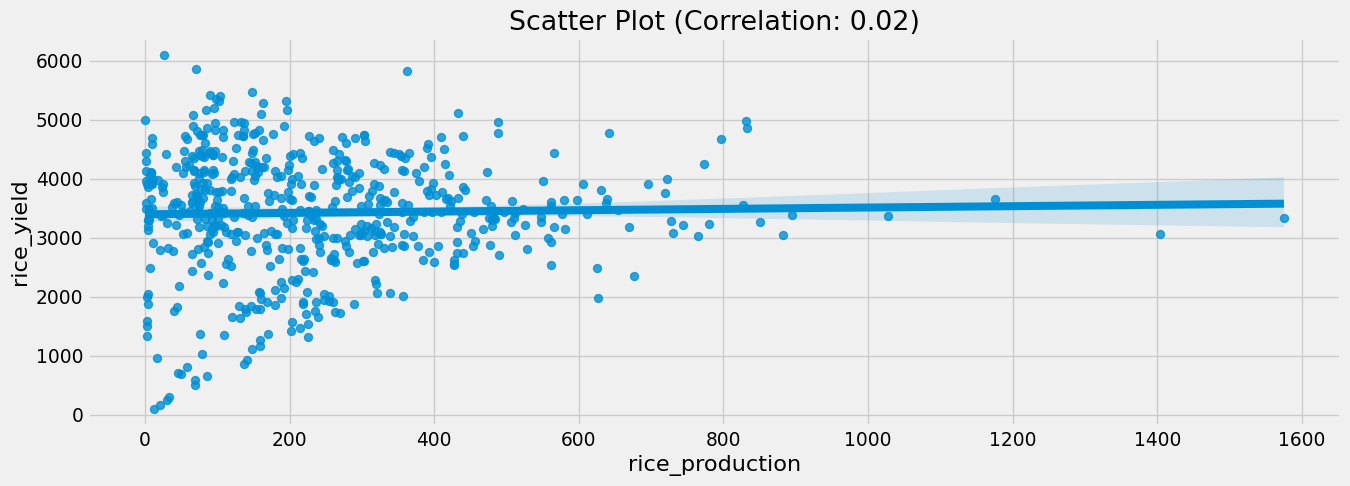

In [30]:
corr = filtered_df['rice_yield'].corr(filtered_df['rice_production'])
print(f'Correlation: {corr:.2f}')

# 2. Scatter plot with regression line
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.regplot(x='rice_production', y='rice_yield', data=filtered_df, ax=axes)
plt.title(f'Scatter Plot (Correlation: {corr:.2f})')
plt.show()

There's almost no correlation between `rice_production` and `rice_yield`.

### Rice Area

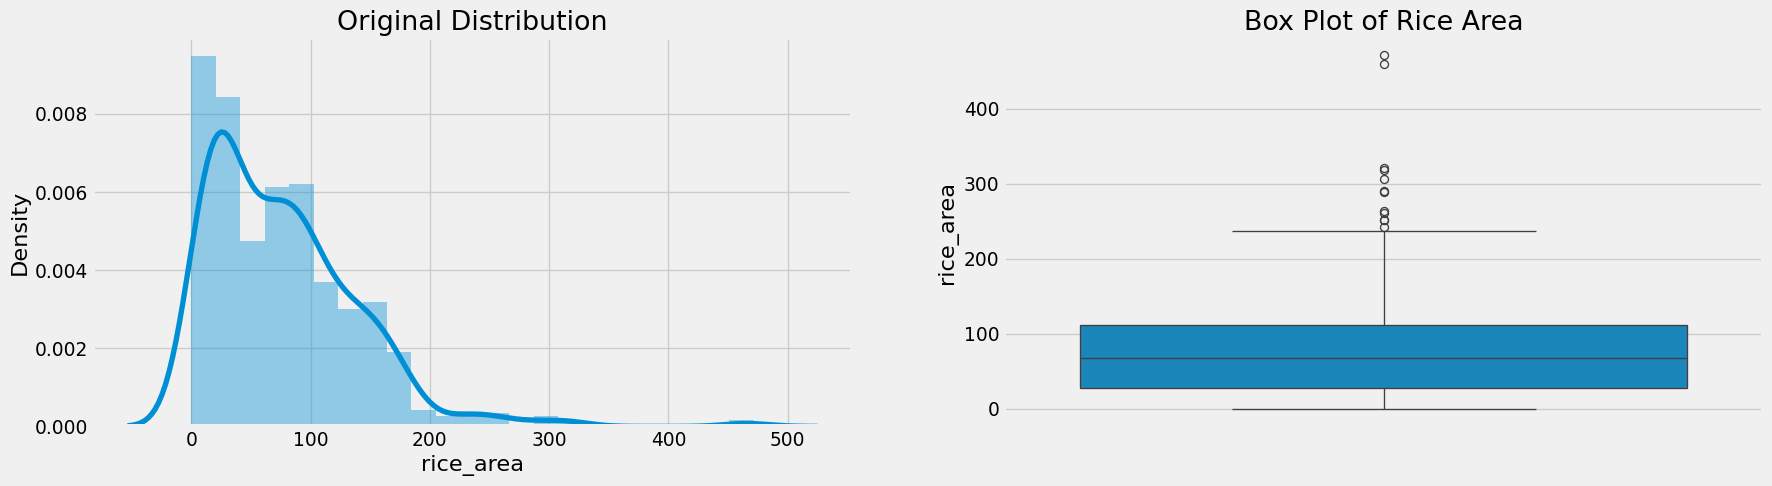

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['rice_area'], ax=axes[0]);
axes[0].set_title('Original Distribution');


#Axes 3: box plot of the distribution
sns.boxplot(filtered_df['rice_area'], ax=axes[1]);
axes[1].set_title('Box Plot of Rice Area');

The data is approximately normal with right skew.

Correlation: -0.34


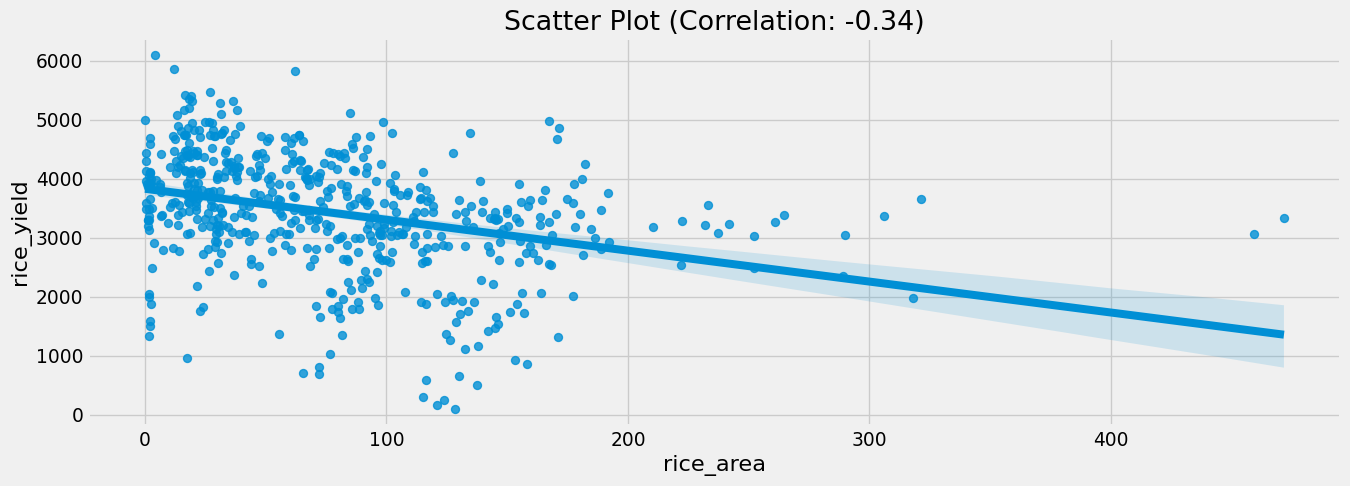

In [32]:
corr = filtered_df['rice_yield'].corr(filtered_df['rice_area'])
print(f'Correlation: {corr:.2f}')

# 2. Scatter plot with regression line
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.regplot(x='rice_area', y='rice_yield', data=filtered_df, ax=axes)
plt.title(f'Scatter Plot (Correlation: {corr:.2f})')
plt.show()

The plot shows weak negative correlation between `rice_area` and `rice_yield`.

### Rice Irrigated Area

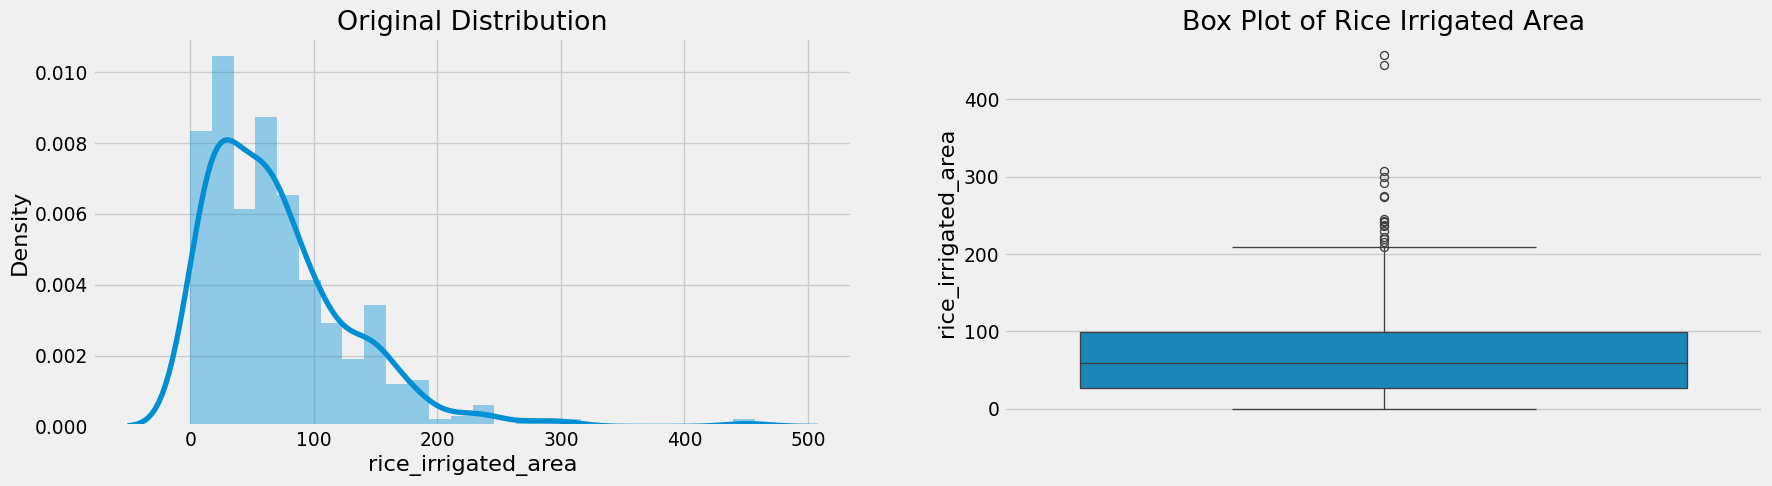

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['rice_irrigated_area'], ax=axes[0]);
axes[0].set_title('Original Distribution');

#Axes 2: box plot of the distribution
sns.boxplot(filtered_df['rice_irrigated_area'], ax=axes[1]);
axes[1].set_title('Box Plot of Rice Irrigated Area');

Correlation: -0.21


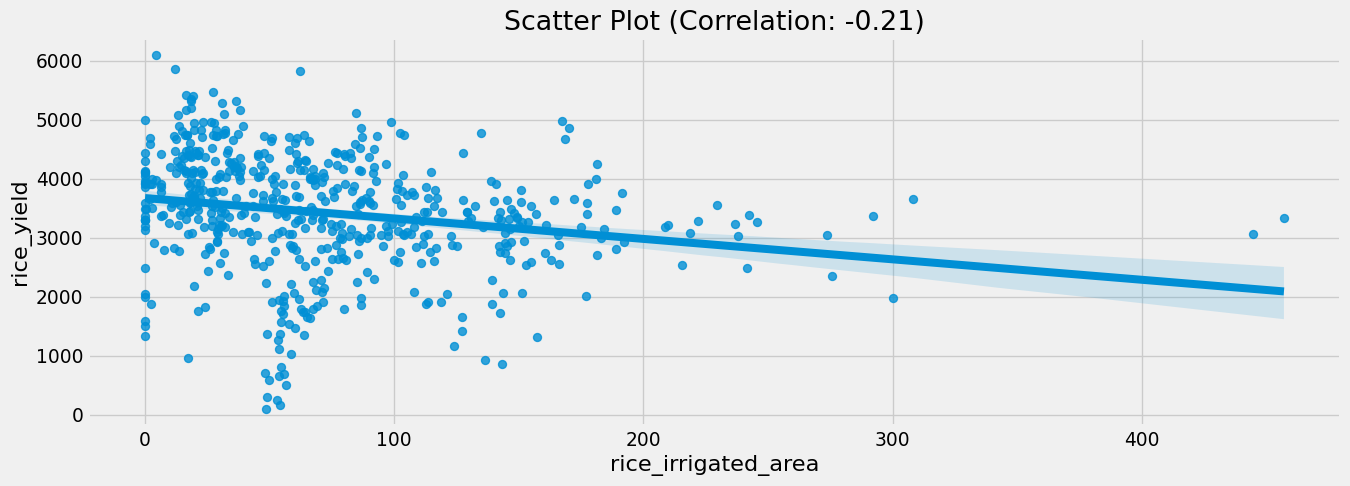

In [34]:
corr = filtered_df['rice_yield'].corr(filtered_df['rice_irrigated_area'])
print(f'Correlation: {corr:.2f}')

# 2. Scatter plot with regression line
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.regplot(x='rice_irrigated_area', y='rice_yield', data=filtered_df, ax=axes)
plt.title(f'Scatter Plot (Correlation: {corr:.2f})')
plt.show()

Again, weak negative correlation between `rice_irrigated_area` and `rice_yield`

### Maximum Temperature

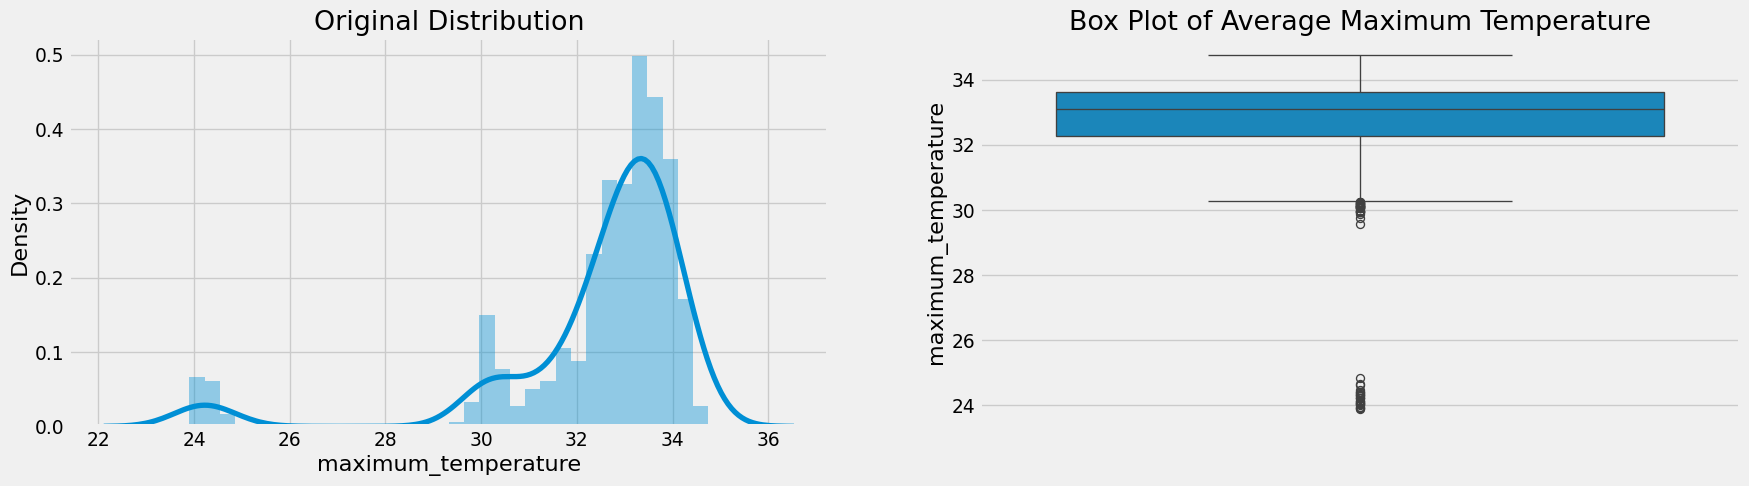

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['maximum_temperature'], ax=axes[0]);
axes[0].set_title('Original Distribution');

# Axes 2: box plot of the original distribution
sns.boxplot(filtered_df['maximum_temperature'], ax=axes[1]);
axes[1].set_title('Box Plot of Average Maximum Temperature');

Correlation: -0.11


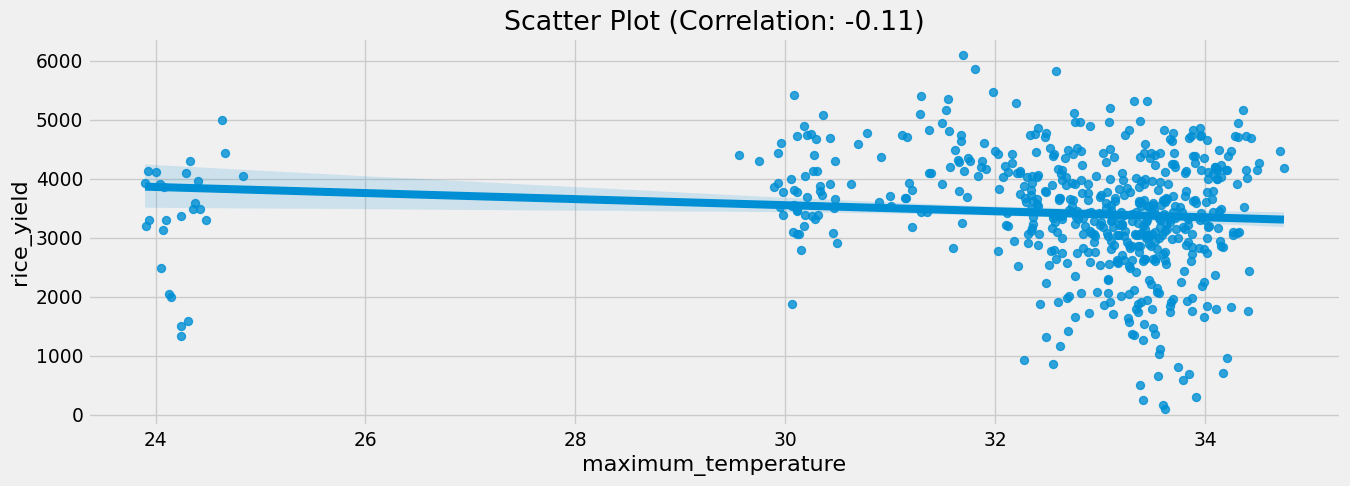

In [36]:
corr = filtered_df['rice_yield'].corr(filtered_df['maximum_temperature'])
print(f'Correlation: {corr:.2f}')

# 2. Scatter plot with regression line
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.regplot(x='maximum_temperature', y='rice_yield', data=filtered_df, ax=axes)
plt.title(f'Scatter Plot (Correlation: {corr:.2f})')
plt.show()

Let's inspect which districts had lower temperatures.

In [37]:
Q1 = filtered_df['maximum_temperature'].quantile(0.25)
Q3 = filtered_df['maximum_temperature'].quantile(0.75)
IQR = Q3 - Q1 # Inter-quartile Range which defines the box in the box plot
IQR, Q1, Q3

(np.float64(1.3350000000000009), np.float64(32.2725), np.float64(33.6075))

In [38]:
lower_whisker = Q1 - 1.5 * IQR
print(lower_whisker)

30.27


In [39]:
filtered_df[filtered_df['maximum_temperature'] < lower_whisker]['dist_name'].unique().tolist()

['Coimbatore', 'Kanyakumari', 'The Nilgiris']

Most of the outliers observed in the box plot comes from the temperature values of `The Nilgiris`, `Coimbatore` and `Kanyakumari` districts. The former district is surrounded by mountains, while the latter is a coastal town in the southerntip of India. `Coimbatore` is a nearby district of `The Nilgiris`.

The box plot suggests outliers (statistically) but they are actually valid environmental data.

### Minimum Temperature

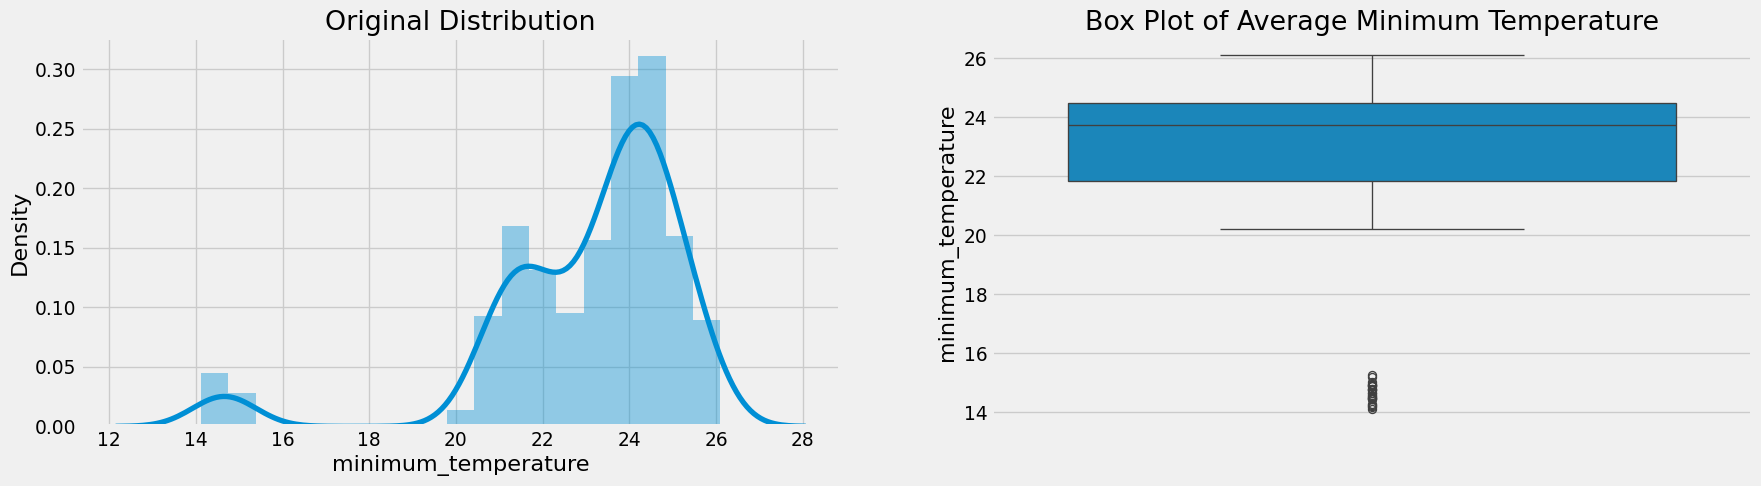

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['minimum_temperature'], ax=axes[0]);
axes[0].set_title('Original Distribution');

# Axes 2: box plot of the distribution
sns.boxplot(filtered_df['minimum_temperature'], ax=axes[1]);
axes[1].set_title('Box Plot of Average Minimum Temperature');

In [41]:
Q1 = filtered_df['minimum_temperature'].quantile(0.25)
Q3 = filtered_df['minimum_temperature'].quantile(0.75)
IQR = Q3 - Q1 
IQR, Q1, Q3

(np.float64(2.6374999999999993), np.float64(21.8425), np.float64(24.48))

In [42]:
lower_whisker = Q1 - 1.5 * IQR
print(lower_whisker)

17.886250000000004


In [43]:
filtered_df[filtered_df['minimum_temperature'] <= lower_whisker]['dist_name'].unique().tolist()

['The Nilgiris']

We can observe that it is indeed `The Nilgiris` district that had the lowest minimum temperature recorded in the dataset.

Correlation: -0.19


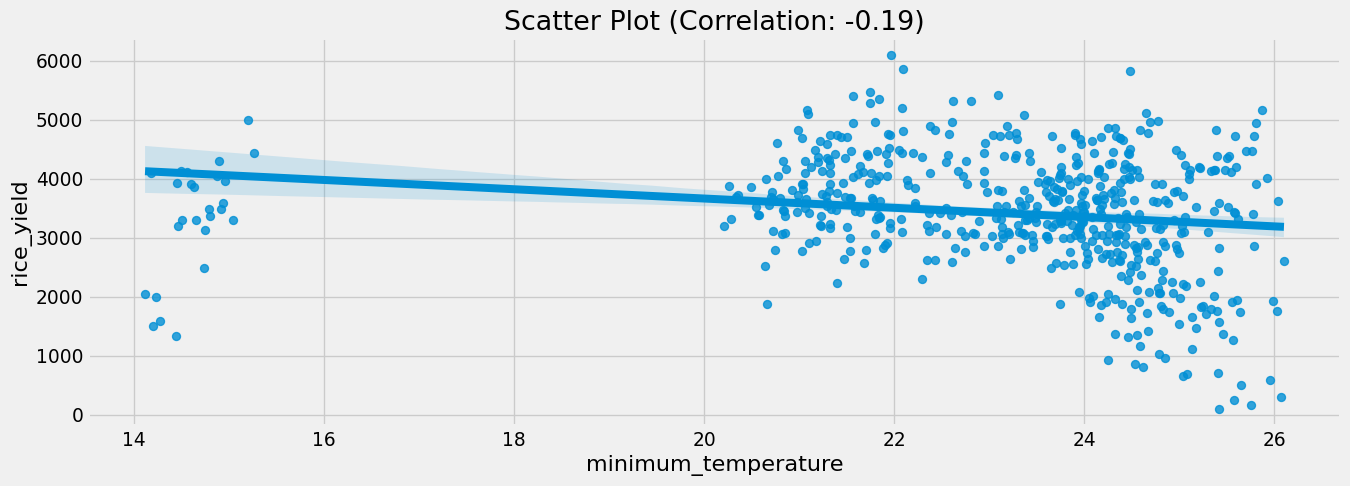

In [44]:
corr = filtered_df['rice_yield'].corr(filtered_df['minimum_temperature'])
print(f'Correlation: {corr:.2f}')

# 2. Scatter plot with regression line
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.regplot(x='minimum_temperature', y='rice_yield', data=filtered_df, ax=axes)
plt.title(f'Scatter Plot (Correlation: {corr:.2f})')
plt.show()

### Precipitation

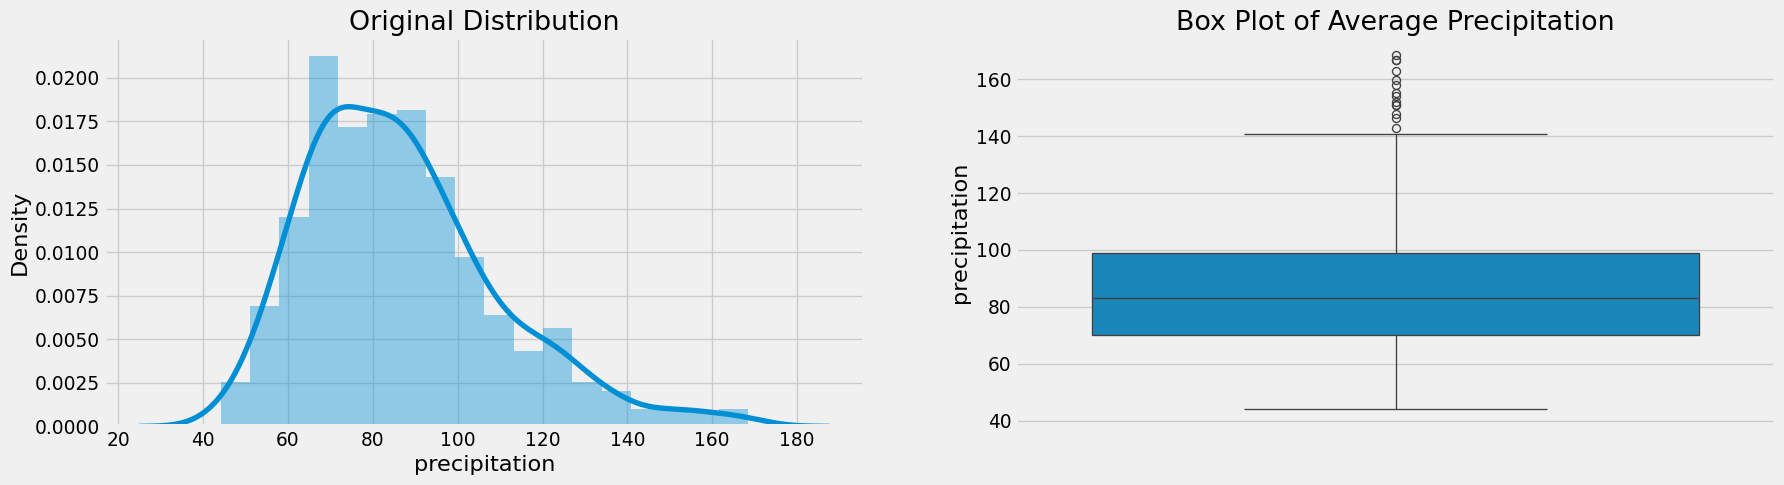

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['precipitation'], ax=axes[0]);
axes[0].set_title('Original Distribution');

# Axes 2: box plot of the distribution
sns.boxplot(filtered_df['precipitation'], ax=axes[1]);
axes[1].set_title('Box Plot of Average Precipitation');

The data is approximately normal with slight right skew.

In [46]:
Q1 = filtered_df['precipitation'].quantile(0.25)
Q3 = filtered_df['precipitation'].quantile(0.75)
IQR = Q3 - Q1

In [47]:
upper_whisker = Q3 + 1.5 * IQR
upper_whisker

np.float64(142.70749999999998)

In [48]:
filtered_df[filtered_df['precipitation'] > upper_whisker]

,year,dist_name,actual_evapotranspiration,rice_area,rice_production,rice_yield,rice_irrigated_area,maximum_temperature,minimum_temperature,precipitation,nitrogen_kharif,nitrogen_rabi,phosphate_kharif,phosphate_rabi,potash_kharif,potash_rabi,total_kharif,total_rabi,water_deficit,year_rescale
33,1991,The Nilgiris,77.83,1.56,4.87,3122.00,0.16,24.07,14.75,146.48,3059.00,1369.00,725.00,381.00,2238.00,724.00,6022.00,2474.00,35.00,25
96,1994,The Nilgiris,83.92,1.59,3.16,1987.00,0.10,24.15,14.24,163.06,1762.00,3207.00,689.00,597.00,2197.00,1070.00,4648.00,4874.00,28.69,22
170,1997,The Nilgiris,73.05,1.72,5.98,3477.00,0.21,24.42,14.79,166.80,3513.00,2935.00,910.00,389.00,2730.00,1800.00,7153.00,5124.00,41.72,19
199,1998,The Nilgiris,80.10,1.74,7.05,4052.00,0.03,24.83,14.88,166.66,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,36.07,18
392,2005,Kancheepuram,82.97,114.72,293.88,2562.00,110.60,33.17,23.70,154.13,9700.00,14878.00,5099.00,6357.00,6826.00,10232.00,21625.00,31467.00,71.14,11
465,2007,The Nilgiris,78.72,1.11,4.29,3865.00,0.01,24.08,14.64,155.19,2431.00,917.00,989.00,401.00,2247.00,1300.00,5667.00,2618.00,33.07,9
487,2008,Nagapattinam,102.02,170.84,225.15,1318.00,157.40,32.48,24.46,157.87,9220.00,11032.00,3754.00,3920.00,3329.00,4041.00,16303.00,18993.00,50.18,8
495,2008,The Nilgiris,78.34,0.78,3.05,3910.00,0.00,24.04,14.60,159.89,2228.00,1469.00,1097.00,730.00,3163.00,1376.00,6488.00,3575.00,31.83,8
526,2009,The Nilgiris,72.95,0.51,1.78,3490.00,0.04,24.36,14.92,150.89,3326.00,1480.00,811.00,383.00,2500.00,1793.00,6637.00,3656.00,41.28,7
544,2010,Kanyakumari,93.12,16.99,80.39,4732.00,16.99,30.21,23.21,142.84,3962.00,3195.00,1598.00,1875.00,2414.00,1817.00,7974.00,6887.00,40.32,6


The coastal and hilly regions had the most precipitation among other districts and it reflects the natural environment in the state.

Correlation: -0.05


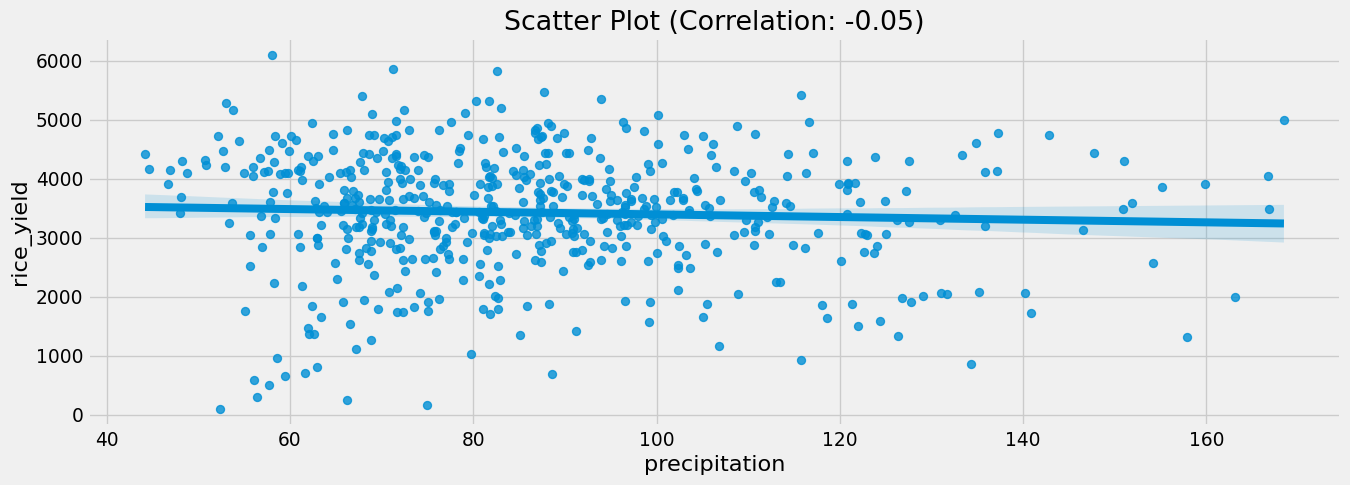

In [49]:
corr = filtered_df['rice_yield'].corr(filtered_df['precipitation'])
print(f'Correlation: {corr:.2f}')

# 2. Scatter plot with regression line
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.regplot(x='precipitation', y='rice_yield', data=filtered_df, ax=axes)
plt.title(f'Scatter Plot (Correlation: {corr:.2f})')
plt.show()

Almost no correlation with the `precipitation` variable.

### Actual Evapotranspiration

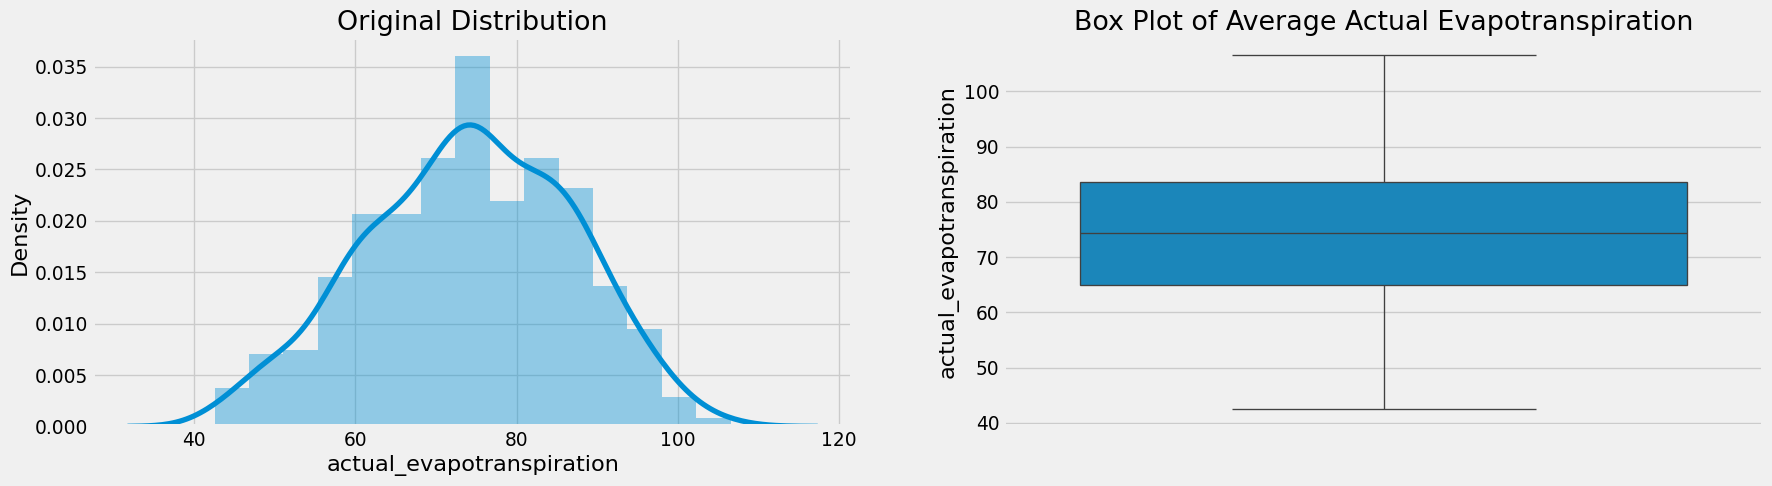

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['actual_evapotranspiration'], ax=axes[0]);
axes[0].set_title('Original Distribution');

# Axes 2: box plot of the distribution
sns.boxplot(filtered_df['actual_evapotranspiration'], ax=axes[1]);
axes[1].set_title('Box Plot of Average Actual Evapotranspiration');

Almost normally distributed with no outliers or skewness.

Correlation: -0.11


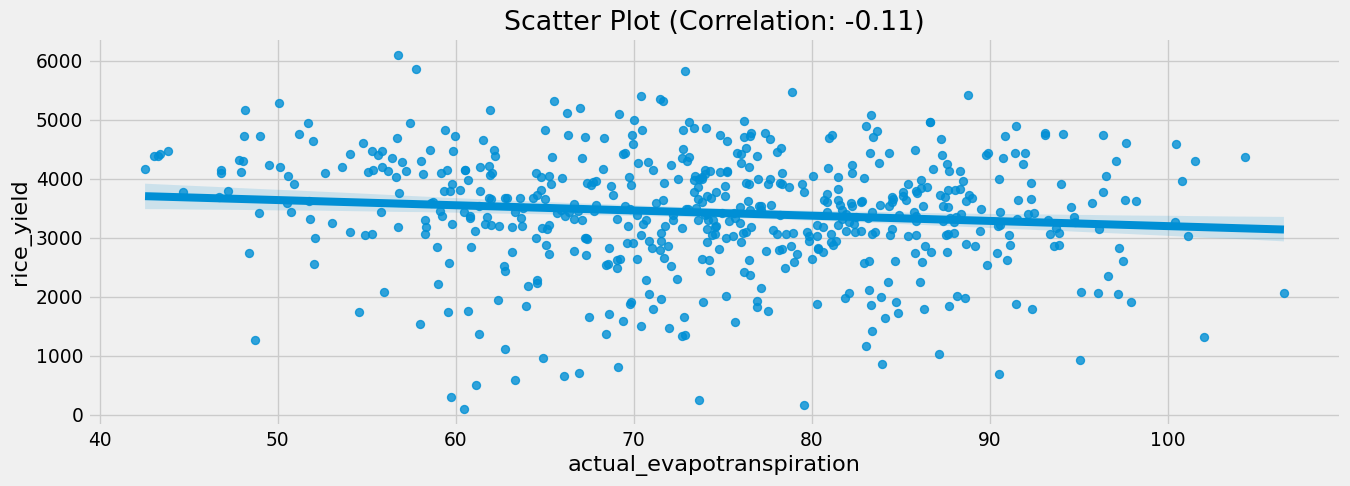

In [51]:
corr = filtered_df['rice_yield'].corr(filtered_df['actual_evapotranspiration'])
print(f'Correlation: {corr:.2f}')

# 2. Scatter plot with regression line
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.regplot(x='actual_evapotranspiration', y='rice_yield', data=filtered_df, ax=axes)
plt.title(f'Scatter Plot (Correlation: {corr:.2f})')
plt.show()

### Water Deficit

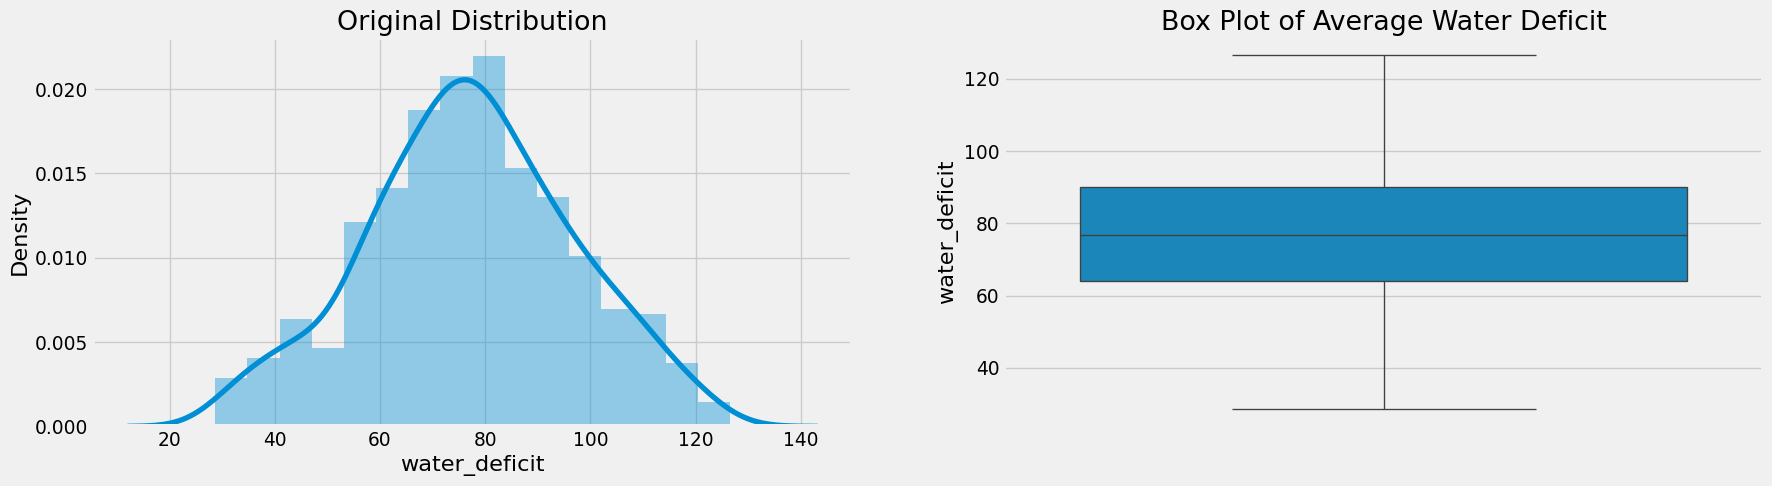

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Axes 1: original distribution
sns.distplot(filtered_df['water_deficit'], ax=axes[0]);
axes[0].set_title('Original Distribution');

# Axes 2: box plot of the distribution
sns.boxplot(filtered_df['water_deficit'], ax=axes[1]);
axes[1].set_title('Box Plot of Average Water Deficit');

Correlation: -0.09


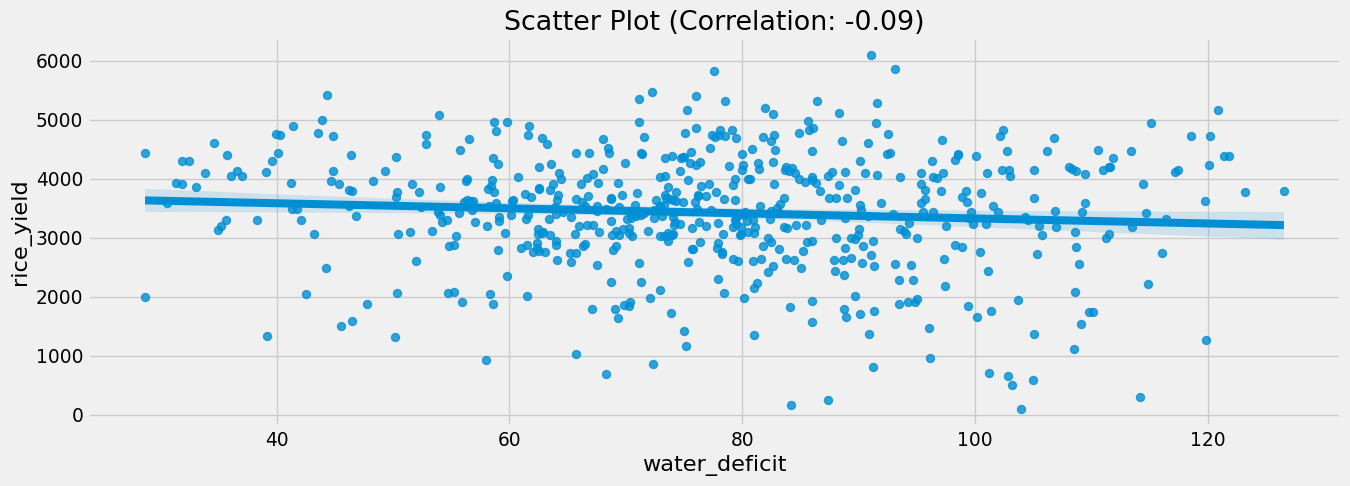

In [53]:
corr = filtered_df['rice_yield'].corr(filtered_df['water_deficit'])
print(f'Correlation: {corr:.2f}')

# 2. Scatter plot with regression line
fig, axes = plt.subplots(1, figsize=(15, 5))
sns.regplot(x='water_deficit', y='rice_yield', data=filtered_df, ax=axes)
plt.title(f'Scatter Plot (Correlation: {corr:.2f})')
plt.show()

In [54]:
filtered_df.columns

Index(['year', 'dist_name', 'actual_evapotranspiration', 'rice_area',
       'rice_production', 'rice_yield', 'rice_irrigated_area',
       'maximum_temperature', 'minimum_temperature', 'precipitation',
       'nitrogen_kharif', 'nitrogen_rabi', 'phosphate_kharif',
       'phosphate_rabi', 'potash_kharif', 'potash_rabi', 'total_kharif',
       'total_rabi', 'water_deficit', 'year_rescale'],
      dtype='object')

In [55]:
remarks = {
    "actual_evapotranspiration": "Almost normally distributed with no outliers or skewness.",
    "rice_area_1000_ha": "The data is approximately normal with right skew.",
    "rice_production_1000_tons": "The data is approximately normal with slight right skew.",
    "rice_yield_kg_per_ha": 'The `rice_yield` variable is approximately normal with left skew.',
    "rice_irrigated_area_1000_ha": "The data is approximately normal with right skew.",
    "maximum_temperature": "Distribution is bi-modal",
    "minimum_temperature": "Distribution is bi-modal.",
    "precipitation": "The data is approximately normal with slight right skew.",      
    "water_deficit": "Almost normally distributed with no outliers or skewness."
}

In [56]:
filtered_df.columns.drop(['dist_name', 'year', 'year_rescale']).to_list()

['actual_evapotranspiration',
 'rice_area',
 'rice_production',
 'rice_yield',
 'rice_irrigated_area',
 'maximum_temperature',
 'minimum_temperature',
 'precipitation',
 'nitrogen_kharif',
 'nitrogen_rabi',
 'phosphate_kharif',
 'phosphate_rabi',
 'potash_kharif',
 'potash_rabi',
 'total_kharif',
 'total_rabi',
 'water_deficit']

## Correlation Analysis

In [57]:
filtered_df.drop(columns=['nitrogen_rabi', 'nitrogen_kharif', 'phosphate_rabi', 'phosphate_kharif', 'potash_rabi', 'potash_kharif'], inplace=True)

In [58]:
filtered_df.columns

Index(['year', 'dist_name', 'actual_evapotranspiration', 'rice_area',
       'rice_production', 'rice_yield', 'rice_irrigated_area',
       'maximum_temperature', 'minimum_temperature', 'precipitation',
       'total_kharif', 'total_rabi', 'water_deficit', 'year_rescale'],
      dtype='object')

In [59]:
corr_df = filtered_df.drop(columns=['dist_name']).corr()
corr_df

,year,actual_evapotranspiration,rice_area,rice_production,rice_yield,rice_irrigated_area,maximum_temperature,minimum_temperature,precipitation,total_kharif,total_rabi,water_deficit,year_rescale
year,1.00,0.21,-0.19,-0.14,0.25,-0.19,0.04,0.10,0.14,0.11,0.13,-0.22,-1.00
actual_evapotranspiration,0.21,1.00,0.35,0.34,-0.11,0.39,-0.06,0.05,0.66,0.07,0.09,-0.77,-0.21
rice_area,-0.19,0.35,1.00,0.90,-0.34,0.96,0.38,0.43,0.07,0.30,0.34,0.07,0.19
rice_production,-0.14,0.34,0.90,1.00,0.02,0.93,0.35,0.35,0.05,0.38,0.43,0.02,0.14
rice_yield,0.25,-0.11,-0.34,0.02,1.00,-0.21,-0.11,-0.19,-0.05,0.13,0.11,-0.09,-0.25
rice_irrigated_area,-0.19,0.39,0.96,0.93,-0.21,1.00,0.36,0.37,0.11,0.38,0.42,-0.00,0.19
maximum_temperature,0.04,-0.06,0.38,0.35,-0.11,0.36,1.00,0.90,-0.54,0.11,0.23,0.62,-0.04
minimum_temperature,0.10,0.05,0.43,0.35,-0.19,0.37,0.90,1.00,-0.36,-0.00,0.10,0.52,-0.10
precipitation,0.14,0.66,0.07,0.05,-0.05,0.11,-0.54,-0.36,1.00,0.00,-0.05,-0.78,-0.14
total_kharif,0.11,0.07,0.30,0.38,0.13,0.38,0.11,-0.00,0.00,1.00,0.89,-0.08,-0.11


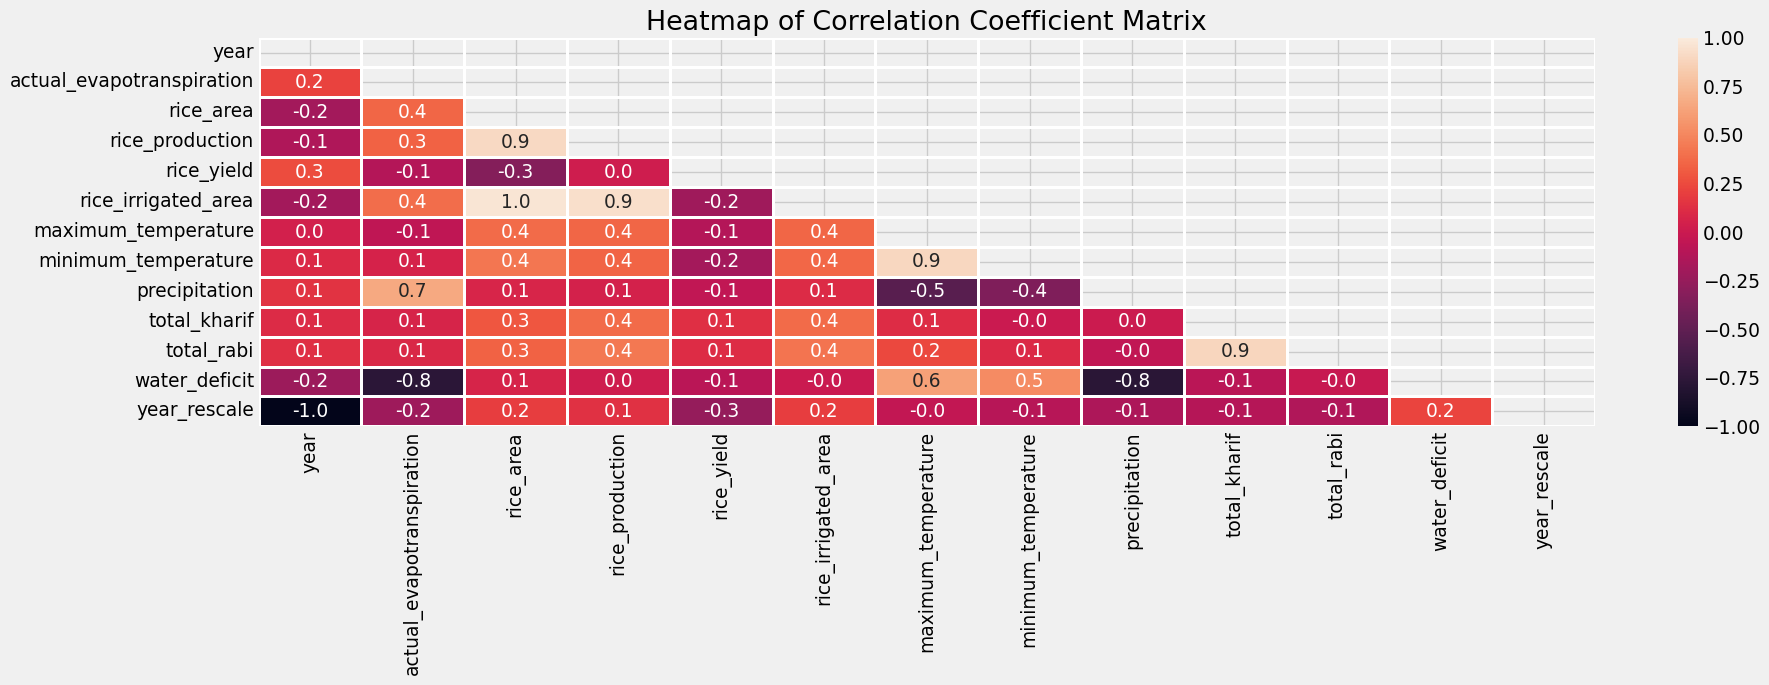

In [60]:
import numpy as np

fig, axes = plt.subplots(1, figsize=(20, 5))

# Plot the heatmap
sns.heatmap(corr_df,
            annot=True,
            # cmap='YlOrRd',
            vmin=-1,
            vmax=1,
            fmt='.1f',
            linewidth=0.8,
            mask=np.triu(np.ones_like(corr_df, dtype=bool))
            )
plt.title('Heatmap of Correlation Coefficient Matrix');